### Home Assigment 1, CMPE 252, Section 01, Fall 2023, San Jose State University
#### Informative Search using A* Algorithm and its comparison to uninformed search methods (BFS, Dijkstra)
All the required utility functions are provided at the beginning of this notebook. There are 8 tasks 
after the utility functions, and a bonus task (10 additional points to HW1, if solved correclty). 

**This assignment is individual**. 

The deadline is Septemper 14, 2023, 11:59PM. The submission is in Canvas.

**please submit two separate files (not in a ZIP file) this notebook and its corresponding PDF (File->Download as -> PDF)**

import the necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import networkx as nx
%matplotlib inline

'build_maze' builds the maze from 'maze_file.txt'.

In [2]:
def build_maze(maze_file):
    '''
    para1: filename of the maze txt file
    return mazes as a numpy array walls: 0 - no wall, 1 - wall in the maze
    '''
    a = open(maze_file, 'r')  
    m=[]
    for i in a.readlines():
        m.append(np.array(i.split(" "), dtype="int32"))
    return np.array(m)

define START and GOAL states within the maze

***Visualize the maze***: 

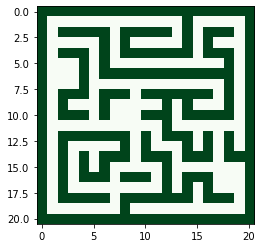

In [3]:
# (you are encouraged to look at the API of 'imshow')
plt.imshow(build_maze("maze_20x20.txt"), cmap='Greens')

In [4]:
START=(1, 1)
GOAL=(19,19)
# Goal for 50X50 maze is (1,49)

'Find_the_edges' builds the graph for the maze, assuming that the robot can move only in the four directions (Up, Down, Right, Left).

In [5]:
def Find_the_edges(maze):
    '''
    para1: numpy array of the maze structure
    return graph of the connected nodes
    '''
    graph={}
    grid_size=len(maze)
    for i in range(grid_size):
        for j in range(grid_size):
            if(maze[i][j]!=1):
                adj=[]
                eles=[]
                if i - 1 >= 0:
                    eles.append((i-1,j))
                if i + 1 < grid_size:
                    eles.append((i+1,j))
                if j - 1 >=0:
                    eles.append((i,j-1))
                if j+1< grid_size:
                    eles.append((i,j+1))
                for ele in eles:
                    if maze[ele[0]][ele[1]] == 0 or maze[ele[0]][ele[1]]=='3' :
                        adj.append((ele[0],ele[1]))
                graph[(i,j)]=adj
    return graph

***Breadth First Search (BFS)***

In [6]:
from collections import deque
def BreadthFirst(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    queue = deque([([start], start)])
    visited = set()
    
    while queue:
        path, current = queue.popleft()
        #print(path, current)
        if current == goal:
            #print( path)
            return visited, np.array(path)
        if current in visited:
            continue
        #print(current)
        visited.add(current)
        for neighbour in graph[current]:
            #print(graph[current])
            p = list(path)
            p.append(neighbour)
            queue.append((p, neighbour))
    return None
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [7]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_20x20.txt")
graph=Find_the_edges(maze1)
visited, path = BreadthFirst(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

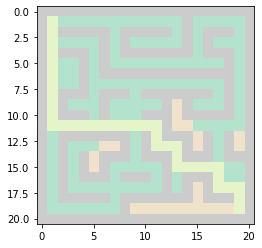

In [8]:
plt.imshow(maze1, cmap='Pastel2')

- ***gray cells*** means the walls of the maze
- ***dark green cells*** means the visited cells of the maze
- ***light green cells*** means the shortest path of the maze
- ***light brown*** means the unvisited cells of the maze

***A**** ***-search*** 

In [9]:
def Euclidean_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Euclidean distance between the 2 nodes
    '''
    return ((node1[0] - node2[0])**2 + (node1[1] - node2[1])**2)**0.5
    pass


In [10]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + Euclidean_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [11]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_20x20.txt")
graph=Find_the_edges(maze1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

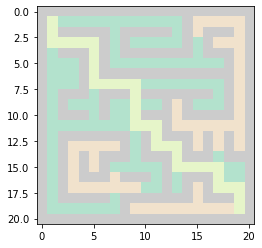

In [12]:
plt.imshow(maze1, cmap='Pastel2')

***Dijkstra Algorithm***

In [13]:

def dijkstra_algorithm(graph, start_node, GOAL):
    '''
    para1: connected graph 
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    unvisited_nodes = list(graph.keys())
 
    # We'll use this dict to save the cost of visiting each node and update it as we move along the graph   
    shortest_path = {}
 
    # We'll use this dict to save the shortest known path to a node found so far
    previous_nodes = {}
 
    # We'll use max_value to initialize the "infinity" value of the unvisited nodes   
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    # However, we initialize the starting node's value with 0   
    shortest_path[start_node] = 0
    
    # The algorithm executes until we visit all nodes
    while GOAL in unvisited_nodes:
        # The code block below finds the node with the lowest score
        current_min_node = None
        for node in unvisited_nodes: # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
                
        # The code block below retrieves the current node's neighbors and updates their distances
        neighbors = graph[current_min_node]
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + 1 
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node
 
        # After visiting its neighbors, we mark the node as "visited"
        unvisited_nodes.remove(current_min_node)

    current= GOAL
    path = []
    while current != START: 
        path.append(current)
        #print(previous_nodes[current])
        current = previous_nodes[current]
    path.append(START) 
    path.reverse() 
    return previous_nodes, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    


'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [14]:
maze1=build_maze("maze_20x20.txt")
graph=Find_the_edges(maze1)
visited, path = dijkstra_algorithm(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

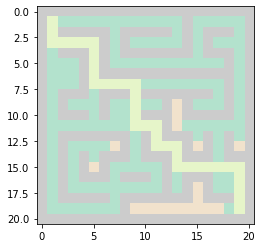

In [15]:
plt.imshow(maze1, cmap='Pastel2')

### Task - 1

Build your maze with dimentions 25 x 25 and a similar complexity (number of obstacles/fences) 
as in the maze provided in 'maze_20x20.txt'. Check that there exists a path between START at the 
(1, 1) and the GOAL at (25, 25) in your maze. Store your maze to 'my_maze_25x25.txt'. Visualize your maze. 
Use your maze in the below tasks. 

# Plotting the maze 25X25

In [16]:
def build_maze1(maze_file):
    '''
    para1: filename of the maze txt file
    return mazes as a numpy array walls: 0 - no wall, 1 - wall in the maze
    '''
    a = open(maze_file, 'r')  
    m=[]
    for i in a.readlines():
        m.append(np.array(i.split(" "), dtype="int32"))
    return np.array(m)

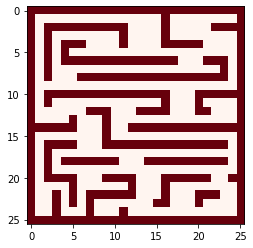

In [17]:
plt.imshow(build_maze1("maze_25x25.txt"), cmap='Reds')

In [18]:
START=(1, 1)
GOAL=(24,23)
# Goal for 50X50 maze is (1,49)

In [19]:
def Find_the_edges(maze):
    '''
    para1: numpy array of the maze structure
    return graph of the connected nodes
    '''
    graph={}
    grid_size=len(maze)
    for i in range(grid_size):
        for j in range(grid_size):
            if(maze[i][j]!=1):
                adj=[]
                eles=[]
                if i - 1 >= 0:
                    eles.append((i-1,j))
                if i + 1 < grid_size:
                    eles.append((i+1,j))
                if j - 1 >=0:
                    eles.append((i,j-1))
                if j+1< grid_size:
                    eles.append((i,j+1))
                for ele in eles:
                    if maze[ele[0]][ele[1]] == 0 or maze[ele[0]][ele[1]]=='3' :
                        adj.append((ele[0],ele[1]))
                graph[(i,j)]=adj
    return graph

# Below is just a demo, please go a bit down for Task 2. You will see where it is

In [20]:
from collections import deque
def BreadthFirst(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    queue = deque([([start], start)])
    visited = set()
    
    while queue:
        path, current = queue.popleft()
        #print(path, current)
        if current == goal:
            #print( path)
            return visited, np.array(path)
        if current in visited:
            continue
        #print(current)
        visited.add(current)
        for neighbour in graph[current]:
            #print(graph[current])
            p = list(path)
            p.append(neighbour)
            queue.append((p, neighbour))
    return None
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [21]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = BreadthFirst(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

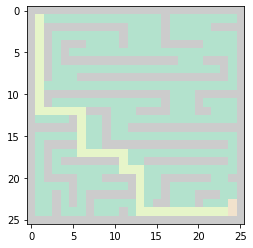

In [22]:
plt.imshow(maze1, cmap='Pastel2')

In [23]:
def Euclidean_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Euclidean distance between the 2 nodes
    '''
    return ((node1[0] - node2[0])**2 + (node1[1] - node2[1])**2)**0.5
    pass


In [24]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    w=1
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + w
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + Euclidean_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [25]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze_1=build_maze1("maze_25x25.txt")
graph=Find_the_edges(maze_1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze_1[i[0],i[1]]=-3
for i in path:
    maze_1[i[0],i[1]]=-1

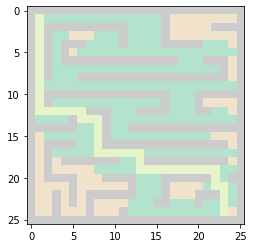

In [26]:
plt.imshow(maze_1, cmap='Pastel2')

In [27]:
#Manhattan distance

In [28]:
# implement the Manhattan distance between the 2 nodes, and update the code for A* accordingly
def Manhattan_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Manhattan distance between the 2 nodes
    '''
    a, b = node1
    c, d = node2
    distance = abs(a - c) + abs(b - d)
    return distance
#     refer to https://xlinux.nist.gov/dads/HTML/manhattanDistance.html
    pass

In [29]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    w=1
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + w
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + Manhattan_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [30]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze_1=build_maze1("maze_25x25.txt")
graph=Find_the_edges(maze_1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze_1[i[0],i[1]]=-3
for i in path:
    maze_1[i[0],i[1]]=-1

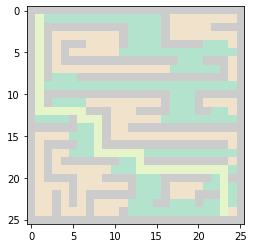

In [31]:
plt.imshow(maze_1, cmap='Pastel2')

In [32]:
print(len(path))

46


In [33]:

def dijkstra_algorithm(graph, start_node, GOAL):
    '''
    para1: connected graph 
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    unvisited_nodes = list(graph.keys())
 
    # We'll use this dict to save the cost of visiting each node and update it as we move along the graph   
    shortest_path = {}
 
    # We'll use this dict to save the shortest known path to a node found so far
    previous_nodes = {}
 
    # We'll use max_value to initialize the "infinity" value of the unvisited nodes   
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    # However, we initialize the starting node's value with 0   
    shortest_path[start_node] = 0
    
    # The algorithm executes until we visit all nodes
    while GOAL in unvisited_nodes:
        # The code block below finds the node with the lowest score
        current_min_node = None
        for node in unvisited_nodes: # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
                
        # The code block below retrieves the current node's neighbors and updates their distances
        neighbors = graph[current_min_node]
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + 1 
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node
 
        # After visiting its neighbors, we mark the node as "visited"
        unvisited_nodes.remove(current_min_node)

    current= GOAL
    path = []
    while current != START: 
        path.append(current)
        #print(previous_nodes[current])
        current = previous_nodes[current]
    path.append(START) 
    path.reverse() 
    return previous_nodes, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    


'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [34]:
maze_1=build_maze1("maze_25x25.txt")
graph=Find_the_edges(maze_1)
visited, path = dijkstra_algorithm(graph, START, GOAL)
for i in visited:
    maze_1[i[0],i[1]]=-3
for i in path:
    maze_1[i[0],i[1]]=-1

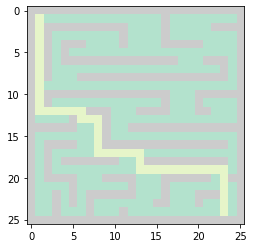

In [35]:
plt.imshow(maze_1, cmap='Pastel2')

In [36]:
print(len(path))

46


### Task - 2

A* algorithm requires a heuristic function. You will try two following heuristics:
- Euclidean distance between the cell coordinates
- Manhattan distance between the cell coordinates 

Run A* with these two heuristic functions for W=1 and find the shortest path and its length in the maze. You can update the interface of astar_path to accept W and a heuristic function

# Using Euclidean Function

In [37]:
def Euclidean_distance(node1, node2):
    return ((node1[0] - node2[0])**2 + (node1[1] - node2[1])**2)**0.5
    pass


In [38]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    w=1
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + w
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + Euclidean_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [39]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze_1=build_maze1("maze_25x25.txt")
graph=Find_the_edges(maze_1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze_1[i[0],i[1]]=-3
for i in path:
    maze_1[i[0],i[1]]=-1

In [40]:
print("The Length of Shortest Path is "+str(len(path)))

The Length of Shortest Path is 46


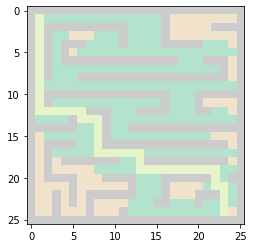

In [41]:
plt.imshow(maze_1, cmap='Pastel2')

# Using Manhattan Function

In [42]:
def Manhattan_distance(node1, node2):

    a, b = node1
    c, d = node2
    distance = abs(a - c) + abs(b - d)
    return distance

    pass

In [43]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    w=1
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + w
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + Manhattan_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [44]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze_1=build_maze1("maze_25x25.txt")
graph=Find_the_edges(maze_1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze_1[i[0],i[1]]=-3
for i in path:
    maze_1[i[0],i[1]]=-1

In [45]:
print("The Length of Shortest Path is "+str(len(path)))

The Length of Shortest Path is 46


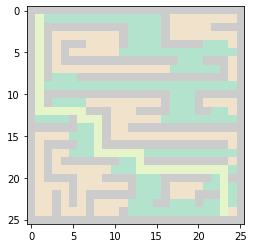

In [46]:
plt.imshow(maze_1, cmap='Pastel2')

### Task - 3


In this task you are asked to solve the maze with 4 different weights, W, in A* for each of the heurstic function mentioned above. Visualize the solution for each W and each heurstic on a separate plot in the same format as in the examle above (see cell 17). ***Chose a broad set of values for W to see the difference.***

# Euclidean distance

In [47]:
import time

In [48]:
tot_time=[]
all_weight=[]
Nodes_sp=[]

In [49]:
def Euclidean_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Euclidean distance between the 2 nodes
    '''
    return ((node1[0] - node2[0])**2 + (node1[1] - node2[1])**2)**0.5
    pass


# weight 0.1

In [50]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    start_time=time.time()
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    w=0.1
    l=[]
    
    while not frontier.empty():
        current = frontier.get()
        l.append(current)
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + w
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + Euclidean_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    end_time = time.time()
    total=end_time-start_time
    print(total)
    tot_time.append(total)
    all_weight.append(w)
    nodesvt=len(l)
    Nodes_sp.append(nodesvt)
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [51]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze_1=build_maze1("maze_25x25.txt")
graph=Find_the_edges(maze_1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze_1[i[0],i[1]]=-3
for i in path:
    maze_1[i[0],i[1]]=-1

0.0


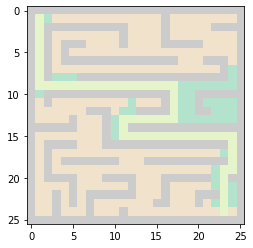

In [52]:
plt.imshow(maze_1, cmap='Pastel2')

# weight 0.7

In [53]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    start_time=time.time()
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    w=0.7
    l=[]
    while not frontier.empty():
        current = frontier.get()
        l.append(current)
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + w
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + Euclidean_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    end_time = time.time()
    total=end_time-start_time
    print(total)
    tot_time.append(total)
    all_weight.append(w)
    nodesvt=len(l)
    Nodes_sp.append(nodesvt)
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [54]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze_1=build_maze1("maze_25x25.txt")
graph=Find_the_edges(maze_1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze_1[i[0],i[1]]=-3
for i in path:
    maze_1[i[0],i[1]]=-1

0.00099945068359375


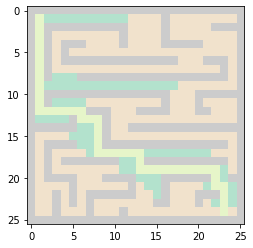

In [55]:
plt.imshow(maze_1, cmap='Pastel2')

# weight 1.4

In [56]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    start_time=time.time()
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    w=1.4
    l=[]
    while not frontier.empty():
        current = frontier.get()
        l.append(current)
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + w
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + Euclidean_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse()
    end_time = time.time()
    total=end_time-start_time
    print(total)
    tot_time.append(total)
    all_weight.append(w)
    nodesvt=len(l)
    Nodes_sp.append(nodesvt)
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [57]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze_1=build_maze1("maze_25x25.txt")
graph=Find_the_edges(maze_1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze_1[i[0],i[1]]=-3
for i in path:
    maze_1[i[0],i[1]]=-1

0.0010218620300292969


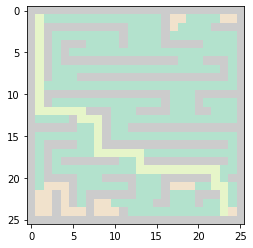

In [58]:
plt.imshow(maze_1, cmap='Pastel2')

# weight 1.5

In [59]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    start_time=time.time()
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    w=1.5
    l=[]
    while not frontier.empty():
        current = frontier.get()
        l.append(current)
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + w
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + Euclidean_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    end_time = time.time()
    total=end_time-start_time
    print(total)
    tot_time.append(total)
    all_weight.append(w)
    nodesvt=len(l)
    Nodes_sp.append(nodesvt)
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [60]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze_1=build_maze1("maze_25x25.txt")
graph=Find_the_edges(maze_1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze_1[i[0],i[1]]=-3
for i in path:
    maze_1[i[0],i[1]]=-1

0.0009670257568359375


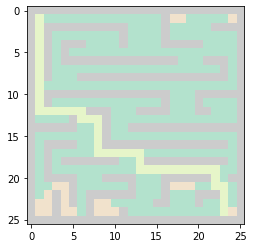

In [61]:
plt.imshow(maze_1, cmap='Pastel2')

# weight 2.3

In [62]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    start_time=time.time()
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    w=2.3
    l=[]
    while not frontier.empty():
        current = frontier.get()
        l.append(current)
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + w
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + Euclidean_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    end_time = time.time()
    total=end_time-start_time
    print(total)
    tot_time.append(total)
    all_weight.append(w)
    nodesvt=len(l)
    Nodes_sp.append(nodesvt)
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [63]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze_1=build_maze1("maze_25x25.txt")
graph=Find_the_edges(maze_1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze_1[i[0],i[1]]=-3
for i in path:
    maze_1[i[0],i[1]]=-1

0.0009944438934326172


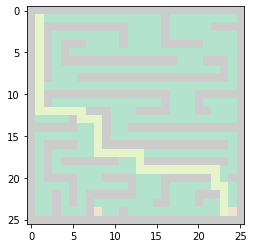

In [64]:
plt.imshow(maze_1, cmap='Pastel2')

# Manhattan Distance

In [65]:
tot_time1=[]
all_weight1=[]
Nodes_sp1=[]

In [66]:
# implement the Manhattan distance between the 2 nodes, and update the code for A* accordingly
def Manhattan_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Manhattan distance between the 2 nodes
    '''
    a, b = node1
    c, d = node2
    distance = abs(a - c) + abs(b - d)
    return distance
#     refer to https://xlinux.nist.gov/dads/HTML/manhattanDistance.html
    pass

# weight=0.2

In [67]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    start_time=time.time()
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    w=0.2
    l=[]
    while not frontier.empty():
        current = frontier.get()
        l.append(current)
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + w
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + Manhattan_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse()
    end_time = time.time()
    total=end_time-start_time
    print(total)
    tot_time1.append(total)
    all_weight1.append(w)
    nodesvt=len(l)
    Nodes_sp1.append(nodesvt)
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [68]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze_1=build_maze1("maze_25x25.txt")
graph=Find_the_edges(maze_1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze_1[i[0],i[1]]=-3
for i in path:
    maze_1[i[0],i[1]]=-1

0.0


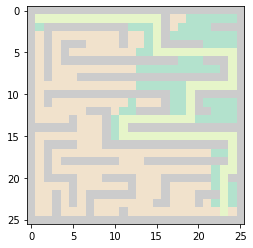

In [69]:
plt.imshow(maze_1, cmap='Pastel2')

# weight=0.9

In [70]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    start_time=time.time()
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    w=0.9
    l=[]
    while not frontier.empty():
        current = frontier.get()
        l.append(current)
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + w
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + Manhattan_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    end_time = time.time()
    total=end_time-start_time
    print(total)
    tot_time1.append(total)
    all_weight1.append(w)
    nodesvt=len(l)
    Nodes_sp1.append(nodesvt)
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [71]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze_1=build_maze1("maze_25x25.txt")
graph=Find_the_edges(maze_1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze_1[i[0],i[1]]=-3
for i in path:
    maze_1[i[0],i[1]]=-1

0.00099945068359375


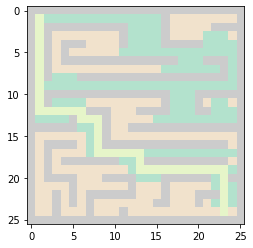

In [72]:
plt.imshow(maze_1, cmap='Pastel2')

# weight=1.5

In [73]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    start_time=time.time()
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    w=1.5
    l=[]
    while not frontier.empty():
        current = frontier.get()
        l.append(current)
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + w
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + Manhattan_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse()
    end_time = time.time()
    total=end_time-start_time
    print(total)
    tot_time1.append(total)
    all_weight1.append(w)
    nodesvt=len(l)
    Nodes_sp1.append(nodesvt)
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [74]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze_1=build_maze1("maze_25x25.txt")
graph=Find_the_edges(maze_1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze_1[i[0],i[1]]=-3
for i in path:
    maze_1[i[0],i[1]]=-1

0.000997304916381836


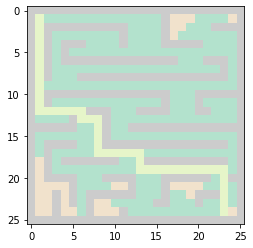

In [75]:
plt.imshow(maze_1, cmap='Pastel2')

# weight 3

In [76]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    start_time=time.time()
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    w=3
    l=[]
    while not frontier.empty():
        current = frontier.get()
        l.append(current)
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + w
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + Manhattan_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    end_time = time.time()
    total=end_time-start_time
    print(total)
    tot_time1.append(total)
    all_weight1.append(w)
    nodesvt=len(l)
    Nodes_sp1.append(nodesvt)
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [77]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze_1=build_maze1("maze_25x25.txt")
graph=Find_the_edges(maze_1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze_1[i[0],i[1]]=-3
for i in path:
    maze_1[i[0],i[1]]=-1

0.0010311603546142578


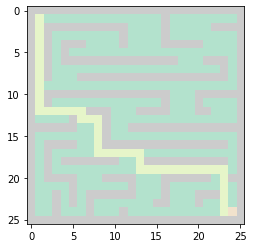

In [78]:
plt.imshow(maze_1, cmap='Pastel2')

# weight 5

In [79]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    start_time=time.time()
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    w=5
    l=[]
    while not frontier.empty():
        current = frontier.get()
        l.append(current)
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + w
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + Manhattan_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse()
    end_time = time.time()
    total=end_time-start_time
    print(total)
    tot_time1.append(total)
    all_weight1.append(w)
    nodesvt=len(l)
    Nodes_sp1.append(nodesvt)
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [80]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze_1=build_maze1("maze_25x25.txt")
graph=Find_the_edges(maze_1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze_1[i[0],i[1]]=-3
for i in path:
    maze_1[i[0],i[1]]=-1

0.0009968280792236328


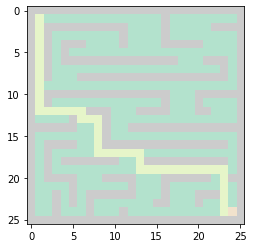

In [81]:
plt.imshow(maze_1, cmap='Pastel2')

Explain what changes you observe for the different weights and why it occurs.

In [82]:
# Here the 5 different Weights I took for Euclidean are
# 1) 1.5
# 2) 0.7
# 3) 0.1
# 4) 2.3
# 5) 1.4

# Here the 5 different Weights I took for Manhattan are
# 1) 1.5
# 2) 3
# 3) 5
# 4) 0.9
# 5) 0.2

# The difference I saw was that the paths traveled for lower weights as it travelled the least as compared to higher weights, Also more the weights 
#the more time it took to traverse
#The solution was stable around weight = 1



### Task - 4


Plot on plt.subplot(121) a) time taken VS Weights

Plot on plt.subplot(122) b) search space (expanded nodes) VS Weights

-- add titles, axis labels, and legends.

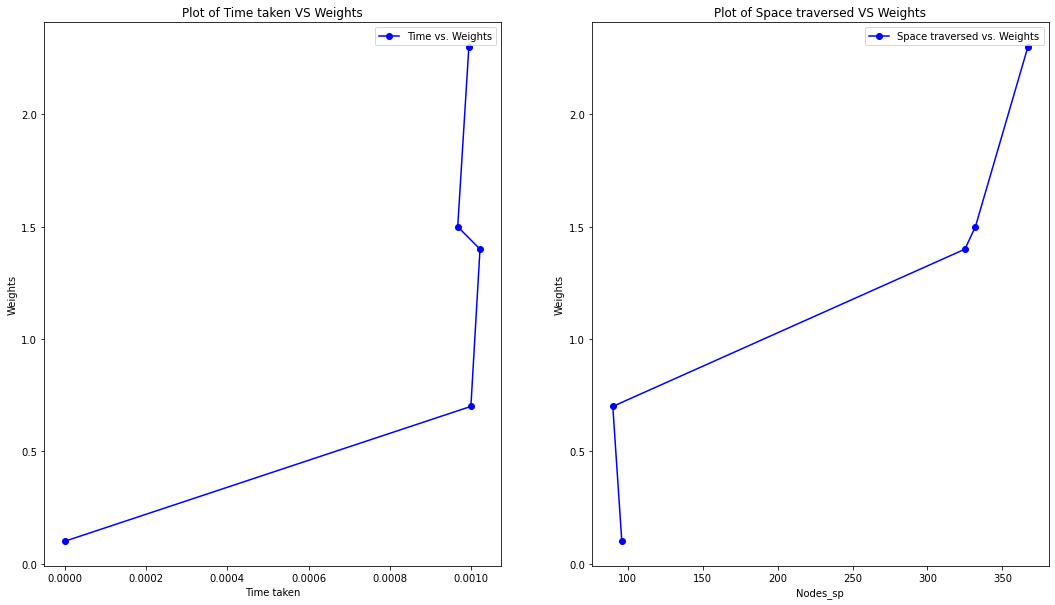

In [83]:
#print(len(tot_time1))
#print(len(all_weight1))
#print(len(tot_time))
#print(len(all_weight))
T = []
for element in tot_time:
    T.append(element * 1000)
plt.subplots(figsize=(18,10))

plt.subplot(1, 2, 1)
plt.plot(tot_time, all_weight , marker='o', color='b', label='Time vs. Weights')
plt.xlabel('Time taken')
plt.ylabel('Weights')
plt.legend()
plt.title('Plot of Time taken VS Weights')

plt.subplot(1, 2, 2)
plt.plot(Nodes_sp,all_weight, marker='o', color='b', label='Space traversed vs. Weights')
plt.xlabel('Nodes_sp')
plt.ylabel('Weights')
plt.legend()
plt.title('Plot of Space traversed VS Weights')


plt.show()

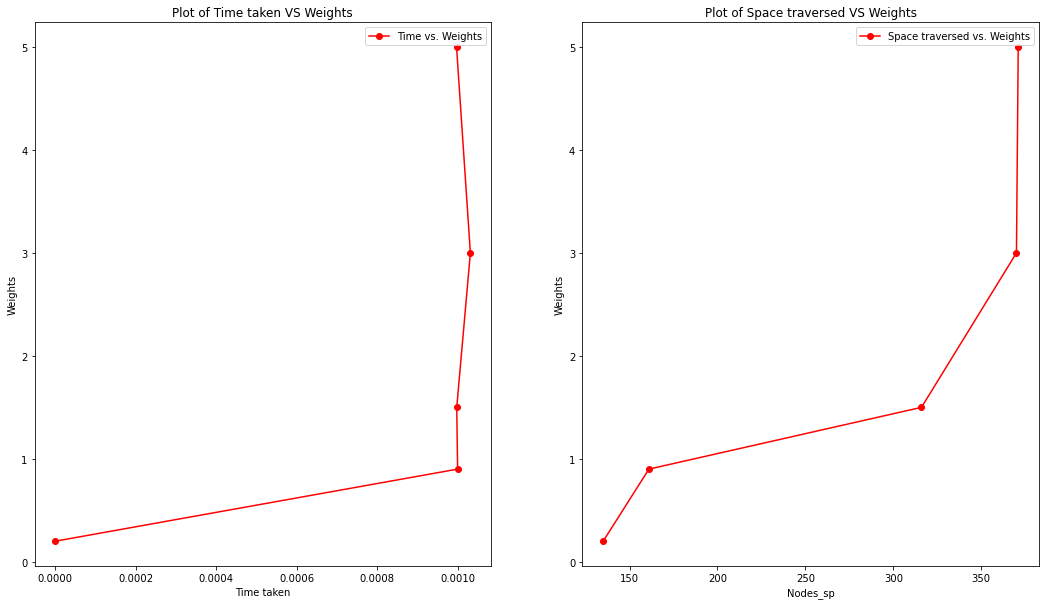

In [84]:
#print(len(tot_time1))
#print(len(all_weight1))
#print(len(tot_time))
#print(len(all_weight))
T = []
for element in tot_time:
    T.append(element * 1000)
plt.subplots(figsize=(18,10))

plt.subplot(1, 2, 1)
plt.plot(tot_time1, all_weight1 , marker='o', color='r', label='Time vs. Weights')
plt.xlabel('Time taken')
plt.ylabel('Weights')
plt.legend()
plt.title('Plot of Time taken VS Weights')

plt.subplot(1, 2, 2)
plt.plot(Nodes_sp1,all_weight1, marker='o', color='r', label='Space traversed vs. Weights')
plt.xlabel('Nodes_sp')
plt.ylabel('Weights')
plt.legend()
plt.title('Plot of Space traversed VS Weights')


plt.show()

### Task - 5

Solve the maze with the Dijkstra algorithm, and visualize the solution in the maze. What is the length of the shortest path?

In [85]:

def dijkstra_algorithm(graph, start_node, GOAL):
    '''
    para1: connected graph 
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    unvisited_nodes = list(graph.keys())
 
    # We'll use this dict to save the cost of visiting each node and update it as we move along the graph   
    shortest_path = {}
 
    # We'll use this dict to save the shortest known path to a node found so far
    previous_nodes = {}
 
    # We'll use max_value to initialize the "infinity" value of the unvisited nodes   
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    # However, we initialize the starting node's value with 0   
    shortest_path[start_node] = 0
    
    # The algorithm executes until we visit all nodes
    while GOAL in unvisited_nodes:
        # The code block below finds the node with the lowest score
        current_min_node = None
        for node in unvisited_nodes: # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
                
        # The code block below retrieves the current node's neighbors and updates their distances
        neighbors = graph[current_min_node]
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + 1 
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node
 
        # After visiting its neighbors, we mark the node as "visited"
        unvisited_nodes.remove(current_min_node)

    current= GOAL
    path = []
    while current != START: 
        path.append(current)
        #print(previous_nodes[current])
        current = previous_nodes[current]
    path.append(START) 
    path.reverse() 
    return previous_nodes, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    


'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [86]:
maze_1=build_maze1("maze_25x25.txt")
graph=Find_the_edges(maze_1)
visited, path = dijkstra_algorithm(graph, START, GOAL)
for i in visited:
    maze_1[i[0],i[1]]=-3
for i in path:
    maze_1[i[0],i[1]]=-1

In [87]:
print("The Length of Shortest Path is "+str(len(path)))

The Length of Shortest Path is 46


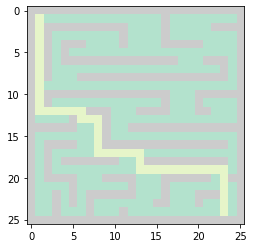

In [88]:
plt.imshow(maze_1, cmap='Pastel2')

### Task - 6

Solve the maze with the BFS algorithm, and visualize the solution in the maze. What is the length of the shortest path?

In [89]:
from collections import deque
def BreadthFirst(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    queue = deque([([start], start)])
    visited = set()
    
    while queue:
        path, current = queue.popleft()
        #print(path, current)
        if current == goal:
            #print( path)
            return visited, np.array(path)
        if current in visited:
            continue
        #print(current)
        visited.add(current)
        for neighbour in graph[current]:
            #print(graph[current])
            p = list(path)
            p.append(neighbour)
            queue.append((p, neighbour))
    return None
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [90]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = BreadthFirst(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

In [91]:
print("The Length of Shortest Path is "+str(len(path)))

The Length of Shortest Path is 46


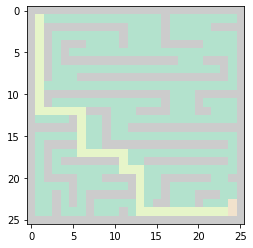

In [92]:
plt.imshow(maze1, cmap='Pastel2')

### Task - 7

Choose 3 random START and GOAL states, and repeat the tasks 2 - 6, and visualize the solution for each. Use W=1 in this task. Explain your observations.

# CASE 1

In [93]:
START=(1, 23)
GOAL=(24, 2)

# BFS 

In [94]:
from collections import deque
def BreadthFirst(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    queue = deque([([start], start)])
    visited = set()
    
    while queue:
        path, current = queue.popleft()
        #print(path, current)
        if current == goal:
            #print( path)
            return visited, np.array(path)
        if current in visited:
            continue
        #print(current)
        visited.add(current)
        for neighbour in graph[current]:
            #print(graph[current])
            p = list(path)
            p.append(neighbour)
            queue.append((p, neighbour))
    return None
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [95]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = BreadthFirst(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

In [96]:
print("The Length of Shortest Path is "+str(len(path)))

The Length of Shortest Path is 57


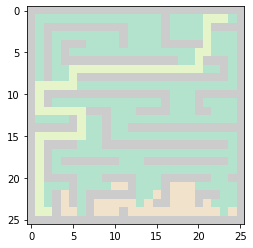

In [97]:
plt.imshow(maze1, cmap='Pastel2')

# Dijistktra Algorithm

In [98]:

def dijkstra_algorithm(graph, start_node, GOAL):
    '''
    para1: connected graph 
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    unvisited_nodes = list(graph.keys())
 
    # We'll use this dict to save the cost of visiting each node and update it as we move along the graph   
    shortest_path = {}
 
    # We'll use this dict to save the shortest known path to a node found so far
    previous_nodes = {}
 
    # We'll use max_value to initialize the "infinity" value of the unvisited nodes   
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    # However, we initialize the starting node's value with 0   
    shortest_path[start_node] = 0
    
    # The algorithm executes until we visit all nodes
    while GOAL in unvisited_nodes:
        # The code block below finds the node with the lowest score
        current_min_node = None
        for node in unvisited_nodes: # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
                
        # The code block below retrieves the current node's neighbors and updates their distances
        neighbors = graph[current_min_node]
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + 1 
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node
 
        # After visiting its neighbors, we mark the node as "visited"
        unvisited_nodes.remove(current_min_node)

    current= GOAL
    path = []
    while current != START: 
        path.append(current)
        #print(previous_nodes[current])
        current = previous_nodes[current]
    path.append(START) 
    path.reverse() 
    return previous_nodes, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    


'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [99]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = dijkstra_algorithm(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

In [100]:
print("The Length of Shortest Path is "+str(len(path)))

The Length of Shortest Path is 57


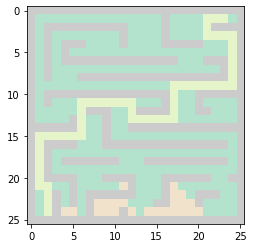

In [101]:
plt.imshow(maze1, cmap='Pastel2')

# A* Search

In [102]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    #start_time=time.time()
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    w=1
    #l=[]
    while not frontier.empty():
        current = frontier.get()
        #l.append(current)
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + w
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + Manhattan_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse()
    #end_time = time.time()
    #total=end_time-start_time
    #print(total)
    #tot_time1.append(total)
    #all_weight1.append(w)
    #nodesvt=len(l)
    #Nodes_sp1.append(nodesvt)
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [103]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

In [104]:
print("The Length of Shortest Path is "+str(len(path)))

The Length of Shortest Path is 57


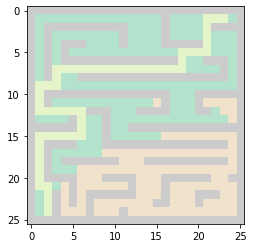

In [105]:
plt.imshow(maze1, cmap='Pastel2')

# CASE 2

In [106]:
START=(5, 23)
GOAL=(22, 15)
# Goal for 50X50 maze is (1,49)

# BFS

In [107]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = BreadthFirst(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

In [108]:
print("The Length of Shortest Path is "+str(len(path)))

The Length of Shortest Path is 50


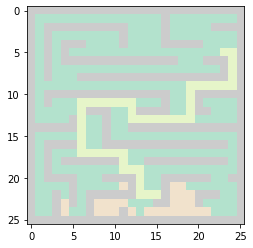

In [109]:
plt.imshow(maze1, cmap='Pastel2')

# DIJISKTRA ALGORITHM

In [110]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = dijkstra_algorithm(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1


In [111]:
print("The Length of Shortest Path is "+str(len(path)))

The Length of Shortest Path is 50


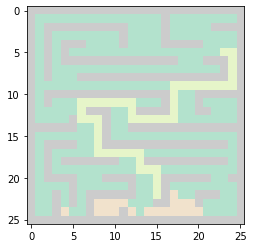

In [112]:
plt.imshow(maze1, cmap='Pastel2')

# A* Search

In [113]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

In [114]:
print("The Length of Shortest Path is "+str(len(path)))

The Length of Shortest Path is 50


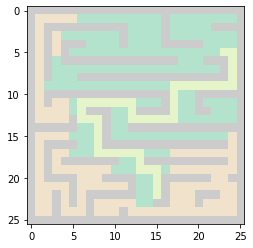

In [115]:
plt.imshow(maze1, cmap='Pastel2')

# CASE 3

In [116]:
START=(20, 23)
GOAL=(1, 20)
# Goal for 50X50 maze is (1,49)

# BFS

In [117]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = BreadthFirst(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

In [118]:
print("The Length of Shortest Path is "+str(len(path)))

The Length of Shortest Path is 51


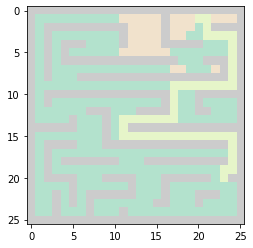

In [119]:
plt.imshow(maze1, cmap='Pastel2')

# DIJISKTRA ALGORITHM

In [120]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = dijkstra_algorithm(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1


In [121]:
print("The Length of Shortest Path is "+str(len(path)))

The Length of Shortest Path is 51


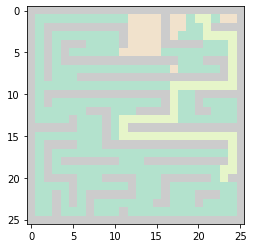

In [122]:
plt.imshow(maze1, cmap='Pastel2')

# A* Search

In [123]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

In [124]:
print("The Length of Shortest Path is "+str(len(path)))

The Length of Shortest Path is 51


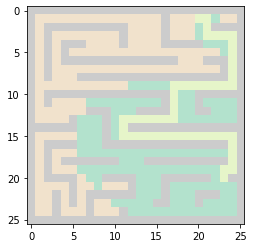

In [125]:
plt.imshow(maze1, cmap='Pastel2')

In [126]:
#Observations:
#on taking different start and end goals the path traversed changes but one thing that remained constant was that A* provided 
#good solution with least traversal

### Task - 8

The initally assumation which we made in the Find_the_edges() is the robot can only move in UP, DOWN, LEFT and RIGHT. Now it can move diagonally as well. Modifiy the function and repeat the tasks 1-6 (and visualize the solution for each). Use W=1 in this task (non need in **"Chose a broad set of values for W to see the difference"**). Explain your observations

In [127]:
def Find_the_edges(maze):
    '''
    para1: numpy array of the maze structure
    return graph of the connected nodes
    '''
    graph={}
    grid_size=len(maze)
    for i in range(grid_size):
        for j in range(grid_size):
            if(maze[i][j]!=1):
                adj=[]
                eles=[]
                if i - 1 >= 0:
                    eles.append((i-1,j))
                if i + 1 < grid_size:
                    eles.append((i+1,j))
                if j - 1 >=0:
                    eles.append((i,j-1))
                if j+1< grid_size:
                    eles.append((i,j+1))
                if i - 1 >= 0 and j+1< grid_size:
                    eles.append((i-1,j+1))
                if i + 1 < grid_size and j+1< grid_size:
                    eles.append((i+1,j+1))
                if j - 1 >=0 and i - 1 >= 0:
                    eles.append((i-1,j-1))
                if j+1< grid_size and i - 1 >= 0:
                    eles.append((i-1,j+1))
                    
                for ele in eles:
                    if maze[ele[0]][ele[1]] == 0 or maze[ele[0]][ele[1]]=='3' :
                        adj.append((ele[0],ele[1]))
                graph[(i,j)]=adj
    return graph

In [128]:
def build_maze1(maze_file):
    '''
    para1: filename of the maze txt file
    return mazes as a numpy array walls: 0 - no wall, 1 - wall in the maze
    '''
    a = open(maze_file, 'r')  
    m=[]
    for i in a.readlines():
        m.append(np.array(i.split(" "), dtype="int32"))
    return np.array(m)

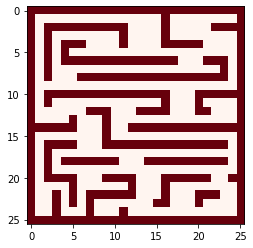

In [129]:
plt.imshow(build_maze1("maze_25x25.txt"), cmap='Reds')

In [130]:
START=(1, 1)
GOAL=(24,23)
# Goal for 50X50 maze is (1,49)

# A* Search

# Using Euclidean Distance

In [131]:
def Euclidean_distance(node1, node2):
    return ((node1[0] - node2[0])**2 + (node1[1] - node2[1])**2)**0.5
    pass


In [132]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    w=1
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + w
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + Euclidean_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [133]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze_1=build_maze1("maze_25x25.txt")
graph=Find_the_edges(maze_1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze_1[i[0],i[1]]=-3
for i in path:
    maze_1[i[0],i[1]]=-1

In [134]:
print("The Length of Shortest Path is "+str(len(path)))

The Length of Shortest Path is 36


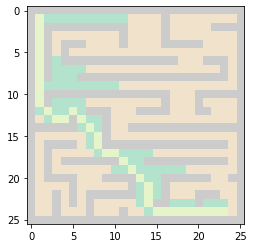

In [135]:
plt.imshow(maze_1, cmap='Pastel2')

# Using Manhattan Distance

In [136]:
def Manhattan_distance(node1, node2):

    a, b = node1
    c, d = node2
    distance = abs(a - c) + abs(b - d)
    return distance

    pass

In [137]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    w=1
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + w
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + Manhattan_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [138]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze_1=build_maze1("maze_25x25.txt")
graph=Find_the_edges(maze_1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze_1[i[0],i[1]]=-3
for i in path:
    maze_1[i[0],i[1]]=-1

In [139]:
print("The Length of Shortest Path is "+str(len(path)))

The Length of Shortest Path is 36


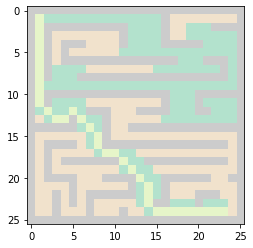

In [140]:
plt.imshow(maze_1, cmap='Pastel2')

# Using BFS

In [141]:
from collections import deque
def BreadthFirst(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    queue = deque([([start], start)])
    visited = set()
    
    while queue:
        path, current = queue.popleft()
        #print(path, current)
        if current == goal:
            #print( path)
            return visited, np.array(path)
        if current in visited:
            continue
        #print(current)
        visited.add(current)
        for neighbour in graph[current]:
            #print(graph[current])
            p = list(path)
            p.append(neighbour)
            queue.append((p, neighbour))
    return None
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [142]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = BreadthFirst(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

In [143]:
print("The Length of Shortest Path is "+str(len(path)))

The Length of Shortest Path is 36


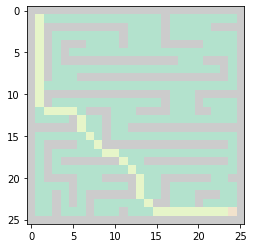

In [144]:
plt.imshow(maze1, cmap='Pastel2')

# Using DFS

In [145]:

def dijkstra_algorithm(graph, start_node, GOAL):
    '''
    para1: connected graph 
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    unvisited_nodes = list(graph.keys())
 
    # We'll use this dict to save the cost of visiting each node and update it as we move along the graph   
    shortest_path = {}
 
    # We'll use this dict to save the shortest known path to a node found so far
    previous_nodes = {}
 
    # We'll use max_value to initialize the "infinity" value of the unvisited nodes   
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    # However, we initialize the starting node's value with 0   
    shortest_path[start_node] = 0
    
    # The algorithm executes until we visit all nodes
    while GOAL in unvisited_nodes:
        # The code block below finds the node with the lowest score
        current_min_node = None
        for node in unvisited_nodes: # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
                
        # The code block below retrieves the current node's neighbors and updates their distances
        neighbors = graph[current_min_node]
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + 1 
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node
 
        # After visiting its neighbors, we mark the node as "visited"
        unvisited_nodes.remove(current_min_node)

    current= GOAL
    path = []
    while current != START: 
        path.append(current)
        #print(previous_nodes[current])
        current = previous_nodes[current]
    path.append(START) 
    path.reverse() 
    return previous_nodes, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    


'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [146]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze_1=build_maze1("maze_25x25.txt")
graph=Find_the_edges(maze_1)
visited, path = dijkstra_algorithm(graph, START, GOAL)
for i in visited:
    maze_1[i[0],i[1]]=-3
for i in path:
    maze_1[i[0],i[1]]=-1

In [147]:
print("The Length of Shortest Path is "+str(len(path)))

The Length of Shortest Path is 36


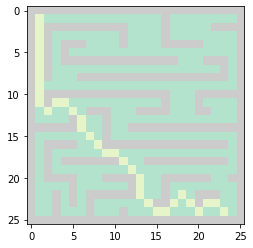

In [148]:
plt.imshow(maze_1, cmap='Pastel2')

In [149]:
#Obervations
#The shortest path is 36 which is greatly reduced as compared to the previous one
#It is able to diagonaly traverse to reach the goal state

### Bonus Task (10 pt): Solving "Sliding Tile Puzzle" with A*-Search
the initial and the final configurations are given at the image below. 
you can use **the number of displaced tiles** as a heuristics function, $h_1$. Use W=1
add you code and print the optimal action sequence (which tile to move) from the intial to the final configuration.
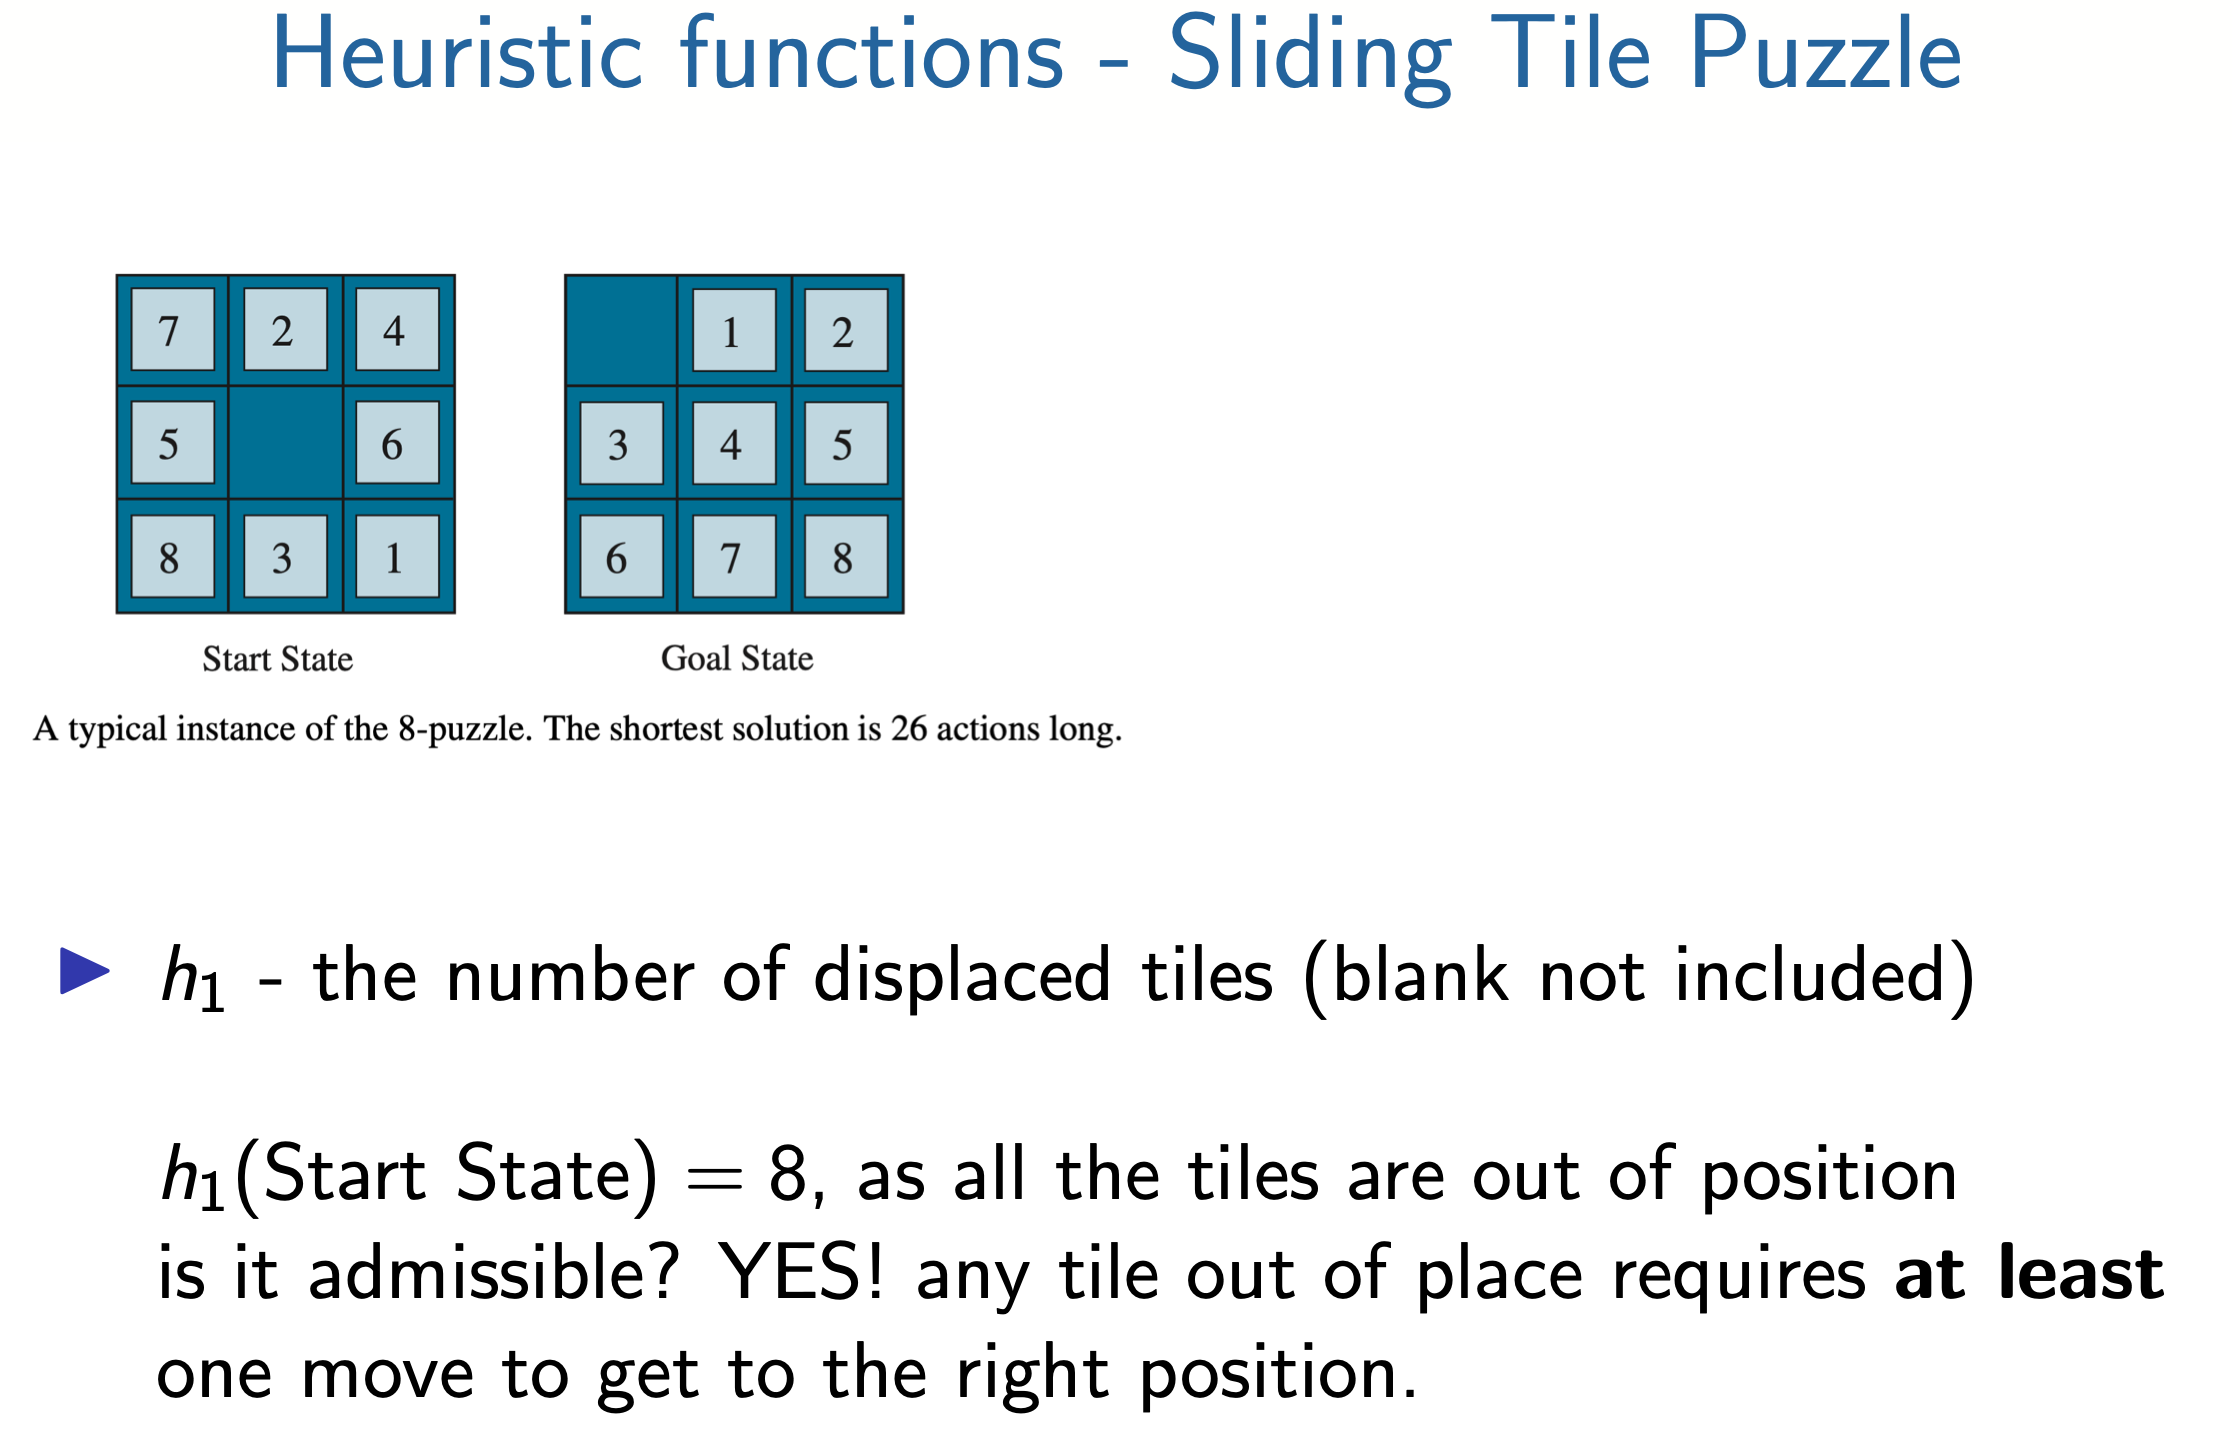

In [150]:
import heapq
import copy

# Tile Heuristic

In [151]:
def heuristic_misplaced_tiles(board, goal):
    tile_counter = 0
    w=1
    for i in range(3):
        for j in range(3):
            if board[i][j] != goal[i][j]:
                tile_counter += w
    return tile_counter

# Initialize and compare with other heuristic

In [152]:
class PuzzleState:
    def __init__(self, board, g=0, h1=0):
        self.board = board
        self.g = g
        self.h1 = h1
        self.parent = None

    def __lt__(self, other):
        return (self.g + self.h1) < (other.g + other.h1)

# Start Board and Goal Board

In [153]:
initial_board = [
    [7, 2, 4],
    [5, 0, 6],
    [8, 3, 1]
]

goal_board = [
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
]


In [154]:
def print_board(board):
    for row in board:
        print(" ".join(map(str, row)))
    print("\n")

# A* Algorithm

In [155]:
def astar(initial_board, goal_board):
    frontier = []
    heapq.heappush(frontier, PuzzleState(initial_board, 0, heuristic_misplaced_tiles(initial_board, goal_board)))

    old_state = set()

    while frontier:
        current_state = heapq.heappop(frontier)
        current_board = current_state.board

        if current_board == goal_board:
            solution_path = []
            while current_state:
                solution_path.append(current_state)
                current_state = current_state.parent
            solution_path.reverse()
            return solution_path

        old_state.add(tuple(map(tuple, current_board)))

        zero_row, zero_col = next((i, j) for i, row in enumerate(current_board) for j, tile in enumerate(row) if tile == 0)

        poss_directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

        for a, b in poss_directions:
            new_row, new_col = zero_row + a, zero_col + b
            if 0 <= new_row < 3 and 0 <= new_col < 3:
                new_board = copy.deepcopy(current_board)
                new_board[zero_row][zero_col], new_board[new_row][new_col] = new_board[new_row][new_col], new_board[zero_row][zero_col]

                if tuple(map(tuple, new_board)) not in old_state:
                    g_value = current_state.g + 1
                    h1_value = heuristic_misplaced_tiles(new_board, goal_board)
                    updated_puzzle_state = PuzzleState(new_board, g_value, h1_value)
                    updated_puzzle_state.parent = current_state
                    heapq.heappush(frontier, updated_puzzle_state)

    return None

In [156]:
solution_path = astar(initial_board, goal_board)
if solution_path is not None:
    print("Best Solution:\n")
    for i, state in enumerate(solution_path):
        print(f"Action {i + 1}:")
        print_board(state.board)
else:
    print("No valid solution found.")

Best Solution:

Action 1:
7 2 4
5 0 6
8 3 1


Action 2:
7 2 4
0 5 6
8 3 1


Action 3:
0 2 4
7 5 6
8 3 1


Action 4:
2 0 4
7 5 6
8 3 1


Action 5:
2 5 4
7 0 6
8 3 1


Action 6:
2 5 4
7 6 0
8 3 1


Action 7:
2 5 4
7 6 1
8 3 0


Action 8:
2 5 4
7 6 1
8 0 3


Action 9:
2 5 4
7 6 1
0 8 3


Action 10:
2 5 4
0 6 1
7 8 3


Action 11:
2 5 4
6 0 1
7 8 3


Action 12:
2 5 4
6 1 0
7 8 3


Action 13:
2 5 4
6 1 3
7 8 0


Action 14:
2 5 4
6 1 3
7 0 8


Action 15:
2 5 4
6 1 3
0 7 8


Action 16:
2 5 4
0 1 3
6 7 8


Action 17:
2 5 4
1 0 3
6 7 8


Action 18:
2 5 4
1 3 0
6 7 8


Action 19:
2 5 0
1 3 4
6 7 8


Action 20:
2 0 5
1 3 4
6 7 8


Action 21:
0 2 5
1 3 4
6 7 8


Action 22:
1 2 5
0 3 4
6 7 8


Action 23:
1 2 5
3 0 4
6 7 8


Action 24:
1 2 5
3 4 0
6 7 8


Action 25:
1 2 0
3 4 5
6 7 8


Action 26:
1 0 2
3 4 5
6 7 8


Action 27:
0 1 2
3 4 5
6 7 8


